IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Mélissa Lacour & Céline Fan

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [2]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import random
import statistics
from sklearn.utils import shuffle
%matplotlib inline

import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie pickle
import pickle as pkl

%load_ext autoreload
%autoreload 2

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)


# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes
data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb')) 
X5D = np.array(data5D[['x1', 'x2','x3', 'x4', 'x5']], dtype=float) # conversion de type pour une meilleure compatibilité
Y5D = np.array(data5D['label'], dtype=float)

In [3]:
data2D[0:5]
print(str(data2D.shape))

(2000, 3)


In [4]:
data5D[0:5]

,x1,x2,x3,x4,x5,label
0,-0.472352,-0.035994,0.572799,2.017446,-1.865967,-1
1,1.993913,0.984667,-1.180237,1.460067,-0.195743,-1
2,0.923188,1.194008,0.065319,0.909784,0.832256,-1
3,2.540148,-0.427836,-0.113014,3.257095,-1.689755,-1
4,4.331413,0.590868,-1.105335,4.475987,-1.790176,-1


In [5]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [6]:
X5D[0:5]

array([[-0.4723522 , -0.03599385,  0.57279854,  2.01744639, -1.86596742],
       [ 1.9939134 ,  0.9846668 , -1.18023654,  1.46006741, -0.19574327],
       [ 0.92318832,  1.19400787,  0.06531872,  0.90978449,  0.83225595],
       [ 2.54014784, -0.42783646, -0.11301444,  3.2570952 , -1.68975456],
       [ 4.33141251,  0.59086794, -1.10533473,  4.47598742, -1.79017634]])

In [7]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

In [8]:
Y5D[0:5]

array([-1., -1., -1., -1., -1.])

## Code utilisé dans le notebook

Voici la classe abstraite Classifier :

In [3]:
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        cpt_ok = 0
        for i in range (0, len(desc_set)):
            if (self.predict(desc_set[i]) == label_set[i]):
                cpt_ok += 1
        
        return cpt_ok/len(label_set)

Voici les différentes fonctions utilisées :

In [4]:
def crossval_strat(X, Y, n_iterations, iteration):
    """renvoie un dataset et un label d'entrainement et de d'apprentissage, suivant le modèle de la validation croisée"""
        # Séparation par classe
    Xp = {}
    Yp = {}
    for i in range(len(X)):
        if Y[i] not in Xp:
            Xp[Y[i]] = []
            Yp[Y[i]] = []
        Xp[Y[i]].append(X[i])
        Yp[Y[i]].append(Y[i])
    
    # Calculer le nombre d'exemples pour chaque ensemble de test
    n_test = {}
    for k, v in Xp.items():
        n_test[k] = int(len(v) / n_iterations)
    
    # Extraire les exemples pour l'ensemble de test courant
    Xtest = []
    Ytest = []
    for k, v in Xp.items():
        start = iteration * n_test[k]
        end = start + n_test[k]
        Xtest += v[start:end]
        Ytest += Yp[k][start:end]
        
    # Extraire les exemples pour l'ensemble d'apprentissage
    Xapp = []
    Yapp = []
    for k, v in Xp.items():
        Xapp += v[:iteration*n_test[k]] + v[(iteration+1)*n_test[k]:]
        Yapp += Yp[k][:iteration*n_test[k]] + Yp[k][(iteration+1)*n_test[k]:]
    
    # Convertir en numpy arrays
    Xapp = np.array(Xapp)
    Yapp = np.array(Yapp)
    Xtest = np.array(Xtest)
    Ytest = np.array(Ytest)
   
    return Xapp, Yapp, Xtest, Ytest

def genere_train_test(desc_set, label_set, n_pos, n_neg):
	""" permet de générer une base d'apprentissage et une base de test
	desc_set: ndarray avec des descriptions
	label_set: ndarray avec les labels correspondants
	n_pos: nombre d'exemples de label +1 à mettre dans la base d'apprentissage
	n_neg: nombre d'exemples de label -1 à mettre dans la base d'apprentissage
	Hypothèses:
    - desc_set et label_set ont le même nombre de lignes)
    - n_pos et n_neg, ainsi que leur somme, sont inférieurs à n (le nombre d'exemples dans desc_set)
	"""

	# On commence par mélanger les données:
	desc_set, label_set = shuffle(desc_set, label_set)

	# On récupère les indices des exemples de classe -1:
	indices_negatifs = np.where(label_set == -1)[0]
	# On récupère les indices des exemples de classe +1:
	indices_positifs = np.where(label_set == +1)[0]

	# On tire aléatoirement n_pos indices parmi les indices des exemples de classe +1:
	indices_positifs_train = random.sample(list(indices_positifs), n_pos)
	# On tire aléatoirement n_neg indices parmi les indices des exemples de classe -1:
	indices_negatifs_train = random.sample(list(indices_negatifs), n_neg)

	# On récupère les indices des exemples de classe -1 qui ne sont pas dans la base d'apprentissage:
	indices_negatifs_test = list(set(indices_negatifs) - set(indices_negatifs_train))
	# On récupère les indices des exemples de classe +1 qui ne sont pas dans la base d'apprentissage:
	indices_positifs_test = list(set(indices_positifs) - set(indices_positifs_train))

	# On récupère les exemples de la base d'apprentissage:
	desc_train = np.concatenate((desc_set[indices_negatifs_train], desc_set[indices_positifs_train]))
	label_train = np.concatenate((label_set[indices_negatifs_train], label_set[indices_positifs_train]))

	# On récupère les exemples de la base de test:
	desc_test = np.concatenate((desc_set[indices_negatifs_test], desc_set[indices_positifs_test]))
	label_test = np.concatenate((label_set[indices_negatifs_test], label_set[indices_positifs_test]))

	return (desc_train, label_train), (desc_test, label_test)

def plot2DSet(desc,labels):    
    """ ndarray * ndarray -> affichage
        la fonction doit utiliser la couleur 'red' pour la classe -1 et 'blue' pour la +1
    """
   #TODO: A Compléter  
    # Affichage de l'ensemble des exemples :
    # Extraction des exemples de classe -1:
    negatifs =desc[labels == -1]
    # Extraction des exemples de classe +1:
    positifs = desc[labels == +1]
    plt.scatter(negatifs[:,0],negatifs[:,1],marker='o', color="red") # 'o' rouge pour la classe -1
    plt.scatter(positifs[:,0],positifs[:,1],marker='x', color="blue") # 'x' bleu pour la classe +1
    return

# plot_frontiere:
def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé: plus il est important
        et plus le tracé de la frontière sera précis.        
        Cette fonction affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon","skyblue"],levels=[-1000,0,1000])

# SOMMAIRE

### <font color="green"> 1. Etude de la classe ClassifierKNN </font>
<p><font color="green"> 1.1 Recherche du k optimal sur une base de test 2D </font> </p>
<p><font color="green"> 1.2 Recherche du k optimal sur une base de test 5D  </font></p>
<p><font color="green"> 1.3 Evolution de l'accuracy au cours de l'apprentissage sur une base de test 2D  </font></p>
<p><font color="green"> 1.4 Evolution de l'accuracy au cours de l'apprentissage sur une base de test 5D </font></p>
<p><font color="green"> 1.5 Test avec validation croisée en 10 - 2D</font></p>
<p><font color="green"> 1.6 Test avec validation croisée en 10 - 5D </font></p>
<p><font color="green"> 1.7 Temps d'exécution - 2D</font></p>
<p><font color="green"> 1.8 Temps d'exécution - 5D</font></p>

### <font color="red"> 2. Etude de la classe ClassifierPerceptron </font>
<p><font color="red"> 2.1 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids 0 sur une base de test 2D  </font> </p>
<p><font color="red"> 2.2 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids 0 sur une base de test 5D  </font></p>
<p><font color="red"> 2.3 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids aléatoire sur une base de test 2D  </font></p>
<p><font color="red"> 2.4 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids aléatoire sur une base de test 5D </font></p>
<p><font color="red"> 2.5 Etude de la convergence et de la variation du poids et du coût sur une base de test 2D</font></p>
<p><font color="red"> 2.6 Etude de la convergence et de la variation du poids et du coût sur une base de test 5D </font></p>
<p><font color="red"> 2.7 Test avec validation croisée en 10 avec w et e idéal - 2D</font></p>
<p><font color="red"> 2.8 Test avec validation croisée en 10 avec w et e idéal - 5D </font></p>
<p><font color="red"> 2.9 Temps d'exécution - 2D</font></p>
<p><font color="red"> 2.10 Temps d'exécution - 5D</font></p>

### <font color="blue"> 3. Etude de la classe ClassifierPerceptronBiais </font>
<p><font color="blue"> 3.1 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids 0 sur une base de test 2D  </font> </p>
<p><font color="blue"> 3.2 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids 0 sur une base de test 5D  </font></p>
<p><font color="blue"> 3.3 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids aléatoire sur une base de test 2D  </font></p>
<p><font color="blue"> 3.4 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids aléatoire sur une base de test 5D </font></p>
<p><font color="blue"> 3.5 Etude de la convergence et de la variation du poids et du coût sur une base de test 2D</font></p>
<p><font color="blue"> 3.6 Etude de la convergence et de la variation du poids et du coût sur une base de test 5D </font></p>
<p><font color="blue"> 3.7 Test avec validation croisée en 10 avec w et e idéal - 2D</font></p>
<p><font color="blue"> 3.8 Test avec validation croisée en 10 avec w et e idéal - 5D </font></p>
<p><font color="blue"> 3.9 Temps d'exécution - 2D</font></p>
<p><font color="blue"> 3.10 Temps d'exécution - 5D</font></p>


### <font color="orange"> 4. Synthèse des résultats</font>
<p><font color="orange"> Vitesse d'apprentissage optimale en fonction du classifier utilisé</font></p>
<p><font color="orange"> Poids optimal en fonction du classifier utilisé</font></p>
<p><font color="orange"> Evolution du coût en fonction du classifier utilisé</font></p>
<p><font color="orange"> Temps d'exécution en fonction du classifier utilisé</font></p>

## <font color="green">1. Etude de la classe ClassifierKNN:</font>
Voici le code de la classe :

In [4]:
class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.k = k
        
        
    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        #liste contenant la distance entre x et toutes les valeurs de desc_set
        dist = np.linalg.norm(self.desc_set - x, axis=1)
        
        #liste contenant la liste des arguments de dist trié par ordre croissant
        arg_dist = np.argsort(dist)
        
        #nombre de label == 1
        #score = np.sum(self.label_set[arg_dist[:self.k]] == 1)
        score = np.sum(self.label_set[arg_dist[:self.k]] == 1)        
        return 2 * (score/self.k -.5)

    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        if (self.score(x) < 0):
            return -1
        else:
            return 1
    

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.desc_set = desc_set
        self.label_set = label_set
        

### <font color="green">1.1  Recherche du k optimal sur une base de test 2D: </font>

#### <font color="blue">Argumentation</font>

Pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes de $k$ et de comparer les taux de bonne classification sur la base de test.

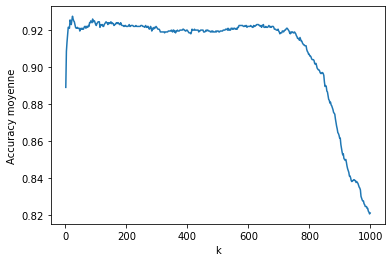

Accuracy maximum pour k = 23


In [27]:
# mélanger des exemples
index = np.random.permutation(len(X2D))
Xm = X2D[index]
Ym = Y2D[index]

# on stocke les accuracies dans une liste :
accuracies_test = []

nb_iter = 10 #nombre d'itérations de la validation croisée
seuil_k = 1000 # seuil max des valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)] # toutes les valeurs de k à regarder:

for k in valeurs_k:
    perf_test = [] #tableau des accuracies pour cette valeur de k

    #validation croisée
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        un_KNN = ClassifierKNN(2, k)
        un_KNN.train(Xapp, Yapp)
        perf_test.append(un_KNN.accuracy(Xtest, Ytest))
        
    acc_moy_test = statistics.mean(perf_test) #moyenne des accuracies de la validation croisée pour cette valeur de k
    accuracies_test.append(acc_moy_test)


# Traçage de la courbe des variations d'accuracy
plt.plot(valeurs_k,accuracies_test)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("k")
plt.show()

print("Accuracy maximum pour k =", valeurs_k[accuracies_test.index(max(accuracies_test))])

#### <font color="blue">Analyse du résultat</font>
On remarque que la valeur de $k$ qui fournit le meilleur résultat est : lorsque $k$ = 23. Cependant, jusqu'à k = 750, les résultats semblent bons.

### <font color="green">1.2 Recherche du k optimal sur une base de test 5D:</font>

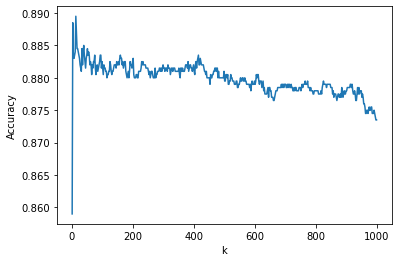

Accuracy maximum pour k = 1


In [20]:
# mélanger des exemples
index = np.random.permutation(len(X5D))
Xm = X5D[index]
Ym = Y5D[index]

# on stocke les accuracies dans une liste :
accuracies = []

nb_iter = 10 #nombre d'itérations de la validation croisée
seuil_k = 1000 # seuil max des valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)] # toutes les valeurs de k à regarder:

for k in valeurs_k:
    perf = [] #tableau des accuracies pour cette valeur de k
    
    #validation croisée
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        un_KNN = ClassifierKNN(5, k)
        un_KNN.train(Xapp, Yapp)
        perf.append(un_KNN.accuracy(Xtest, Ytest))
        
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    accuracies.append(acc_moy)
    #print("k = " + str(k) + " Taux de bonne classification moyen : " + str(acc_moy))

# Traçage de la courbe des variations d'accuracy
plt.plot(valeurs_k,accuracies)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

print("Accuracy maximum pour k =", valeurs_k[accuracies_test.index(max(accuracies_test))])

#### <font color="blue">Analyse du résultat</font>
On remarque que la valeur de $k$ qui fournit le meilleur résultat est : lorsque $k$ = 1. Ici aussi, jusqu'à k = 800, les résultats ne baissent pas significativement.

### <font color="green">1.3 Evolution de l'accuracy au cours de l'apprentissage sur une base de test 2D:</font>

#### <font color="blue">Argumentation</font>
Nous avons voulu voir si le fait d'entraîner plusieurs fois le classifier avec les mêmes données faisait progresser son accuracy. Pour cela nous entraînons le classifier KNN plusieurs fois de suite avec le même ensemble de données.




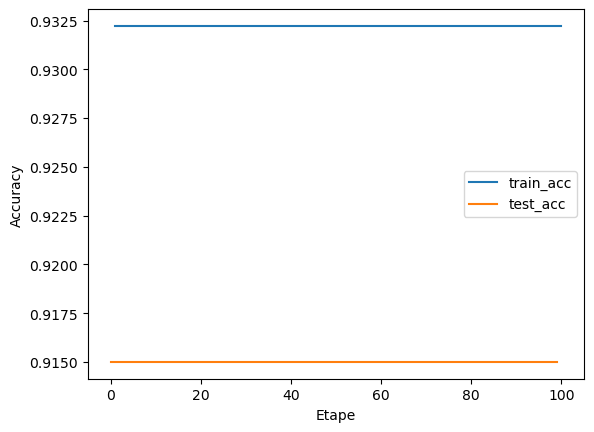

Accuracy finale (train):  0.9322222222222222
Accuracy finale (test) :  0.915


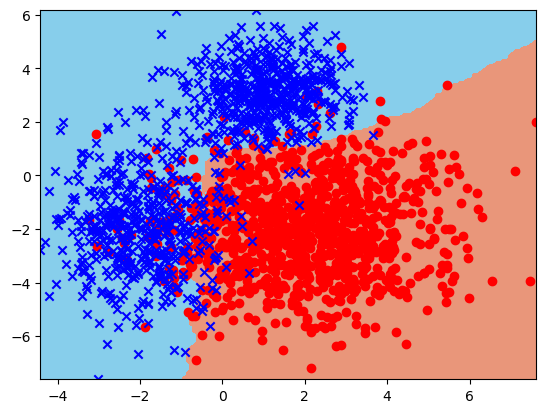

In [6]:
(train_desc, train_label), (test_desc, test_label) = genere_train_test(X2D, Y2D,900,900)


# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:
train_acc = []
test_acc = []
classifierKNN2 = ClassifierKNN(2, 23)

# Réalisation de N itérations
N = 100
for i in range(N):
    classifierKNN2.train(train_desc, train_label)
    train_acc.append(classifierKNN2.accuracy(train_desc, train_label))
    test_acc.append(classifierKNN2.accuracy(test_desc, test_label))

# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc,test_acc)  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.legend(['train_acc','test_acc'])
plt.show()

# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
plot_frontiere(X2D,Y2D,classifierKNN2,step=150)
plot2DSet(X2D,Y2D)

print("Accuracy finale (train): ",  classifierKNN2.accuracy(train_desc, train_label))
print("Accuracy finale (test) : ", classifierKNN2.accuracy(test_desc, test_label))

#### <font color="blue">Analyse du résultat</font>

L'accuracy ne varie pas au cours de l'apprentissage du classifierKNN ce qui semble cohérent, en effet, par définition ce classifier ne fait pas d'apprentissage donc si la valeur de k est bien choisie, alors la performance du classifier sera bonne et constante au fil du temps.

### <font color="green">1.4 Evolution de l'accuracy au cours de l'apprentissage sur une base de test 5D:</font>

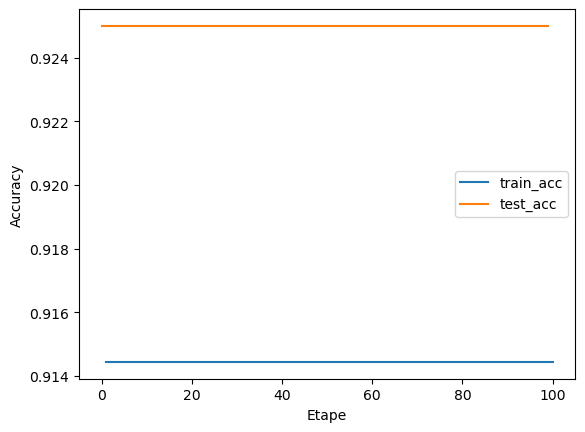

Accuracy finale (train):  0.9144444444444444
Accuracy finale (test) :  0.925


In [13]:
(train_desc, train_label), (test_desc, test_label) = genere_train_test(X5D, Y5D,900,900)

# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:
train_acc = []
test_acc = []
classifierKNN2 = ClassifierKNN(5, 5)

# Réalisation de N itérations
N = 100
for i in range(N):
    classifierKNN2.train(train_desc, train_label)
    train_acc.append(classifierKNN2.accuracy(train_desc, train_label))
    test_acc.append(classifierKNN2.accuracy(test_desc, test_label))

# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc,test_acc)  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.legend(['train_acc','test_acc'])
plt.show()


print("Accuracy finale (train): ",  classifierKNN2.accuracy(train_desc, train_label))
print("Accuracy finale (test) : ", classifierKNN2.accuracy(test_desc, test_label))

#### <font color="blue">Analyse du résultat</font>
Même résultat que pour le dataset 2D : l'accuracy ne varie pas lorsqu'on entraîne plus le classifier KNN.

### <font color="green">1.5 Test avec validation croisée en 10 - 2D</font>

#### <font color="blue">Argumentation</font>
Cette étude permet de mesurer la capacité du classifier KNN à généraliser sur de nouvelles données (test set) en utilisant la méthode de validation croisée.

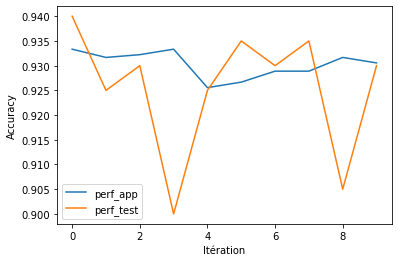

Accuracy moyenne apprentissage :  0.9302777777777778
Accuracy moyenne test :  0.9255


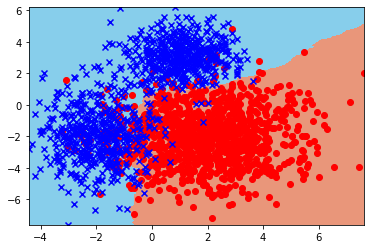

In [16]:

nb_iter = 10
perf_app = []
perf_test = []

# mélanger des exemples
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

# réaliser une validation croisée 
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = ClassifierKNN(2, 23)
    un_KNN.train(Xapp, Yapp)
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    
    
# Traçage de la courbe des variations d'accuracy
plt.plot(range(nb_iter),perf_app, perf_test)  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.legend(['perf_app','perf_test'])
plt.show()

# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
plot_frontiere(X2D,Y2D,un_KNN,step=150)
plot2DSet(X2D,Y2D)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))

#### <font color="blue">Analyse du résultat</font>

Avec des datasets différents, on observe de légères variations de l'accuracy.
Mais le résultat global est satisfaisant, puisqu'on obtient une accuracy de test moyenne de 0.924. On observe par ailleurs que la classification du dataset d'apprentissage est de qualité plus constante que celle du dataset de test, ce qui est normal car le modèle est entraîné sur le dataset d'apprentissage, tandis qu'il est confronté à de nouvelles données sur le dataset de test. Enfin, sur la deuxième image, on voit une répresentation graphique de la séparation des classes (pour la classification du dernier KNN initialisé dans la boucle), on constate que pour la plupart des points ils se situent sur une surface de la même couleur qu'eux, ce qui signifie qu'ils sont bien classés.

### <font color="green">1.6 Test avec validation croisée en 10 - 5D</font>

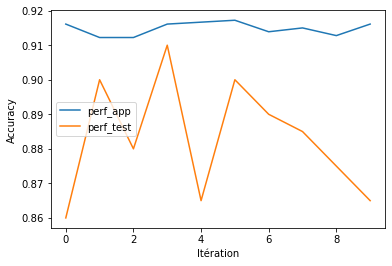

Accuracy moyenne apprentissage :  0.9148333333333334
Accuracy moyenne test :  0.883


In [18]:
nb_iter = 10
perf_app = []
perf_test = []

# mélanger des exemples
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]

# réaliser une validation croisée 
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = ClassifierKNN(5, 5)
    un_KNN.train(Xapp, Yapp)
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    
    
# Traçage de la courbe des variations d'accuracy
plt.plot(range(nb_iter),perf_app, perf_test)  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.legend(['perf_app','perf_test'])
plt.show()


#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))

#### <font color="blue">Analyse du résultat</font>
On obtient un résultat similaire au dataset 2D : l'accuracy varie légèrement en fonction du dataset utilisé mais reste globalement satisfaisante : on a une accuracy moyenne de test de 0.88. On observe également que la qualité de la classification du dataset d'entraînement est plus constante que celle de test.

### <font color="green">1.7 Temps d'exécution - 2D</font>

#### <font color="blue">Argumentation</font>
Pour finir l'étude de ce classifier, nous étudions le temps que met le classifier KNN à s'entraîner puis à classifier, afin de pouvoir comparer avec les autres classifiers (cf. partie 4 : Synthèse des résultats)

In [19]:
import time

nb_iter = 10
perf_app = []
perf_test = []
train_time = []
predict_time = []

# mélanger des exemples
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = ClassifierKNN(2, 1)

    start_time = time.time()
    un_KNN.train(Xapp, Yapp)
    train_time.append(time.time() - start_time)

    start_time = time.time()
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    predict_time.append(time.time() - start_time)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))
print("Temps d'entraînement moyen : ", statistics.mean(train_time))
print("Temps de prédiction moyen : ", statistics.mean(predict_time))

Accuracy moyenne apprentissage :  1.0
Accuracy moyenne test :  0.889
Temps d'entraînement moyen :  2.8133392333984377e-06
Temps de prédiction moyen :  0.3503504514694214


### <font color="green">1.8 Temps d'exécution - 5D</font>


In [20]:
import time

nb_iter = 10
perf_app = []
perf_test = []
train_time = []
predict_time = []

# mélanger des exemples
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = ClassifierKNN(5, 23)

    start_time = time.time()
    un_KNN.train(Xapp, Yapp)
    train_time.append(time.time() - start_time)

    start_time = time.time()
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    predict_time.append(time.time() - start_time)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))
print("Temps d'entraînement moyen : ", statistics.mean(train_time))
print("Temps de prédiction moyen : ", statistics.mean(predict_time))

Accuracy moyenne apprentissage :  0.892
Accuracy moyenne test :  0.8845000000000001
Temps d'entraînement moyen :  3.0040740966796874e-06
Temps de prédiction moyen :  0.4033346176147461


## <font color="red">2. Etude de la classe ClassifierPerceptron:</font>
Voici la classe ClassifierPerceptron :

In [5]:
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True ):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        self.init = init
        if(init == True):
            self.w = np.zeros(input_dimension)
        else:
            tmp = np.random.uniform(0,1, input_dimension)
            tmp = tmp*2-1
            self.w = [0.001*i for i in tmp]
        self.allw = [self.w.copy()] # stockage des premiers poids
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """  
        desc_copie = desc_set.copy()
        np.random.shuffle(desc_copie)
        
        for i in range(len(desc_copie)):
            p = self.predict(desc_copie[i])
            indice_xi = np.where(np.all(desc_set == desc_copie[i], axis=1))[0][0]
            yi = label_set[indice_xi]
            
            if(p != yi):
                self.w = self.w + self.learning_rate * yi * desc_copie[i]
                self.allw.append(self.w.copy())
        return
     
    def train(self, desc_set, label_set, nb_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - nb_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.001) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """
        res = []
        for i in range(nb_max):
            old_w = self.w
            self.train_step(desc_set, label_set)
            diff = old_w - self.w
            erreur = np.linalg.norm([abs(j) for j in diff])
            res.append(erreur)
            
            if(erreur < seuil):
                break

        return res

    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        v = np.dot(x,self.w)
        return v
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        if (self.score(x) < 0):
            return -1
        else:
            return 1
            
    def get_allw(self):
        return self.allw


### <font color="red">2.1 Variation de l'accuracy en fonction de la vitesse d'apprentissage de poids 0 sur une base de test 2D:</font>

#### <font color="blue">Argumentation</font>

Pour décider quelle peut être la valeur du learning rate optimale, on décide de tester plusieurs valeurs différentes de $e$ avec un poids w = 0 (d'abord) et de comparer les taux de bonne classification sur la base de test.


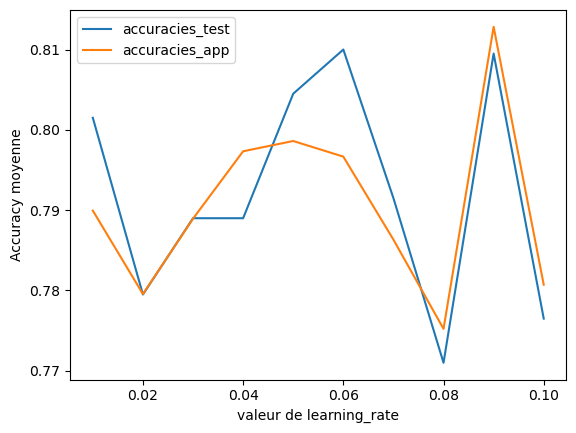

In [6]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptron(2,e)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("test e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("app e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e,accuracies)
plt.plot(valeurs_e,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>
On remarque que la valeur de $e$ qui fournit le meilleur résultat est : lorsque $e$ = 0.09.

### <font color="red">2.2 Variation de l'accuracy en fonction de la vitesse d'apprentissage sur une base de test 5D:</font>

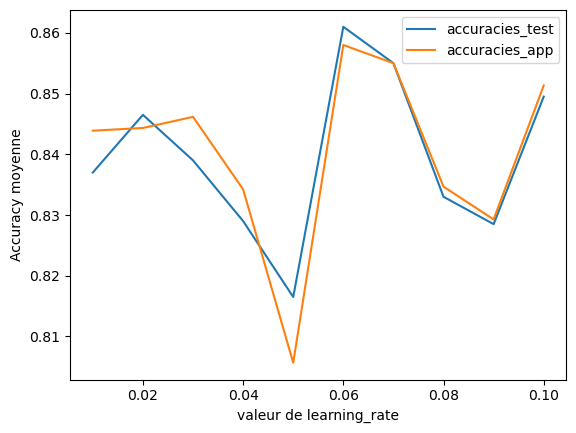

In [7]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10

#on fait varier le paramètre learning_rate
for e in np.arange(0.01, 0.11, 0.01):
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptron(5,e)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(np.arange(0.01, 0.11, 0.01),accuracies)
plt.plot(np.arange(0.01, 0.11, 0.01),accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()


#### <font color="blue">Analyse du résultat</font>
On remarque que la valeur de $e$ qui fournit le meilleur résultat est : lorsque $e$ = 0.07.

### <font color="red">2.3 Variation de l'accuracy en fonction de la vitesse d'apprentissage de poids aléatoire sur une base de test 2D:</font>

#### <font color="blue">Argumentation</font>
Pour décider quelle peut être la valeur du learning rate optimale, on décide de tester plusieurs valeurs différentes de $e$ avec un poids w aléatoire et de comparer les taux de bonne classification sur la base de test.

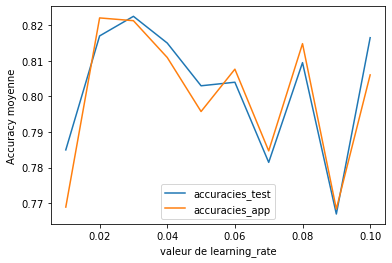

In [6]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptron(2,e,False)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e,accuracies)
plt.plot(valeurs_e,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>

On remarque que la valeur de $e$ qui fournit le meilleur résultat est : lorsque $e$ = 0.03 lorsque le poids est aléatoire.
Cependant, la moyenne du taux de bonne classification est moins bonne que lorsque le poids était initialisé à 0.

### <font color="red">2.4 Variation de l'accuracy en fonction de la vitesse d'apprentissage de poids aléatoire sur une base de test 5D:</font>

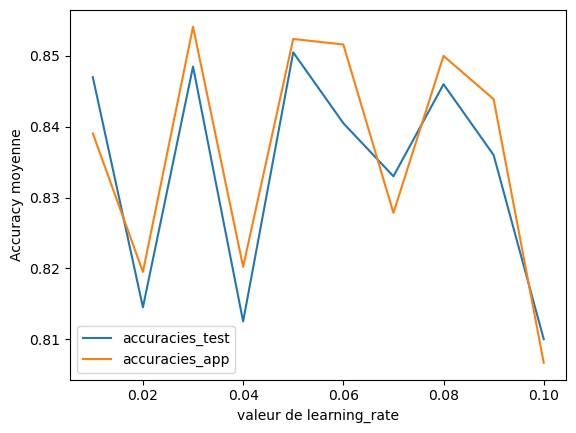

In [16]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptron(5,e, False)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e ,accuracies)
plt.plot(valeurs_e ,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>
On remarque que la valeur de $e$ qui fournit le meilleur résultat est : lorsque $e$ = 0.05 lorsque le poids est aléatoire.
Tout comme le test sur le dataset 2D, la moyenne du taux de bonne classification est moins bonne que lorsque le poids était initialisé à 0.

### <font color="red">2.5 Etude de la convergence et de la variation du poids et du coût sur une base de test 2D:</font>

#### <font color="blue">Argumentation</font>

Pour vérifier si l'algorithme converge vers une solution satisfaisante et à quelle vitesse, on étudie les variations du poids et du coût au fil de l'apprentissage. La première boît ci-dessous étudie la variation des poids, la deuxième boît la variation du coût, enfin la troisième boîte représente le coût en fonction du poids.

Nb iterations réalisées:  100


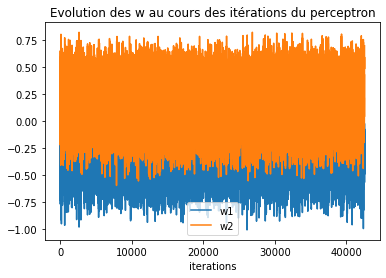

In [6]:
#Etude de la variation des poids

index = np.random.permutation(len(X2D)) # mélange des index
Xm2 = X2D[index]
Ym2 = Y2D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

# Paramètres pour le perceptron:
dim = 2
eps = 0.09    # learning rate
poids_0 = False   # valeur initiale des poids à 0

# Réinitialisation de la graine pour la mise au point (à enlever ensuite !)
#np.random.seed(42)   # on prend 42 comme graine

perceptron2 = ClassifierPerceptron(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron2.train(Xm2, Ym2, nb_max=100)
print("Nb iterations réalisées: ", len(les_differences))

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw2 = np.array(perceptron2.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw2[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw2[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

min_cout: 766.2685509196615
 -> w: [-0.7939229  0.5522493]


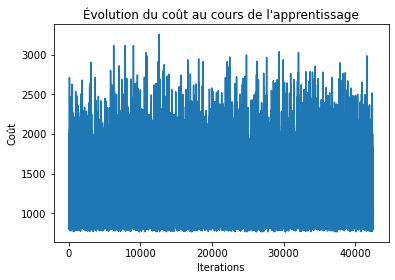

In [11]:
#Etude de la variation du coût

# on considère les poids de perceptron2 générés dans une boite précédente:
allw2 = np.array(perceptron2.get_allw()) 

# ------------------------  A COMPLETER :
tabc = []
for w in allw2:
    cout = 0
    for i in range(len(Xm2)):
        score = np.dot(w, Xm2[i])
        if score * Ym2[i] < 1:
            cout += max(0, 1 - score * Ym2[i])
    tabc.append(cout)

print("min_cout: " + str(min(tabc)))
print(" -> w: " + str(allw2[tabc.index(min(tabc))]))
plt.figure()
plt.plot(tabc)
plt.xlabel('Iterations')
plt.ylabel('Coût')
plt.title('Évolution du coût au cours de l\'apprentissage')
plt.show() 

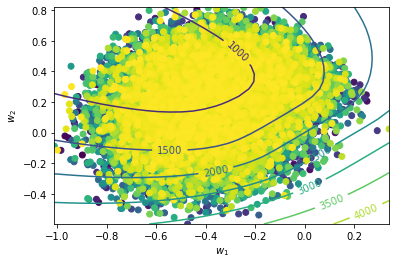

In [8]:
# Représentation du poids en fonction du coût

# 1. Construction d'une grille de 'toutes' les valeurs possibles de w dans les bornes de allw
mmax=allw2.max(0)
mmin=allw2.min(0)
x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))

# 2. Evaluation du cout pour toutes ces solutions potentielles

# construction de res = calcul du cout du perceptron pour tous les couples
# (w1,w2) définis dans grid

# Comme plus haut mais version compacte
res = np.array([np.sum([max(0, 1 - np.dot(w, Xm2[i]) * Ym2[i]) for i in range(len(Xm2))]) for w in grid])


# remise en forme de res
res=res.reshape(x1grid.shape) 

fig, ax = plt.subplots() # pour 1 et 2
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
CS = ax.contour(x1grid,x2grid,res)
ax.clabel(CS, inline=1, fontsize=10)

# ajoute de la couleur: jaune = plus grande itération
ax.scatter(allw2[:,0], allw2[:,1], c=np.arange(len(allw2)))


#### <font color="blue">Analyse du résultat</font>
L'image peut être interprétée comme suit : les points jaunes sont les itérations pour lesquelles le perceptron a obtenu un coût élevé et les points violets sont ceux pour lesquels le perceptron a eu le coût le plus bas. Au cours de l'apprentissage, le coût évolue des points jaunes vers les points violets, ici situés aux extrémités. A noter qu'ici le perceptron avait été initialisé avec un poids de 0, soit un poids de coût élevé si l'on observe l'image.

### <font color="red">2.6 Etude de la convergence et de la variation du poids et du coût sur une base de test 5D:</font>

Nb iterations réalisées:  100


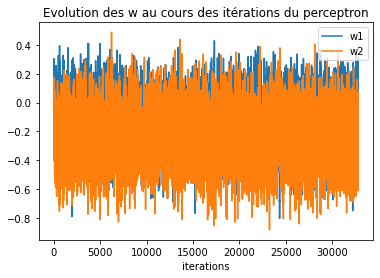

In [13]:
#Etude de la variation des poids

index = np.random.permutation(len(X5D)) # mélange des index
Xm5 = X5D[index]
Ym5 = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

# Paramètres pour le perceptron:
dim = 5
eps = 0.09   # learning rate
poids_0 = False   # valeur initiale des poids à 0

# Réinitialisation de la graine pour la mise au point (à enlever ensuite !)
#np.random.seed(42)   # on prend 42 comme graine

perceptron5 = ClassifierPerceptron(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron5.train(Xm5, Ym5, nb_max=100)
print("Nb iterations réalisées: ", len(les_differences))

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw5 = np.array(perceptron5.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw5[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw5[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

min_cout: 574.6683743680887
 -> w: [-0.46382396 -0.36978819  0.08176333 -0.84046196 -0.33165017]


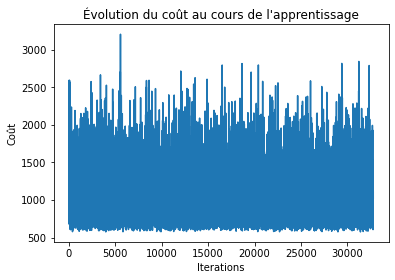

In [14]:
#Etude de la variation du coût

# on considère les poids de perceptron5 générés dans une boite précédente:
allw5 = np.array(perceptron5.get_allw()) 

# ------------------------  A COMPLETER :
tabc = []
for w in allw5:
    cout = 0
    for i in range(len(Xm5)):
        score = np.dot(w, Xm5[i])
        if score * Ym5[i] < 1:
            cout += max(0, 1 - score * Ym5[i])
    tabc.append(cout)

print("min_cout: " + str(min(tabc)))
print(" -> w: " + str(allw5[tabc.index(min(tabc))]))
plt.figure()
plt.plot(tabc)
plt.xlabel('Iterations')
plt.ylabel('Coût')
plt.title('Évolution du coût au cours de l\'apprentissage')
plt.show() 

#### <font color="blue">Analyse du résultat</font>
Ici on ne peut pas visualiser facilement la surface de coût car les données sont en 5D. On voit cependant que sur le début de l'apprentissage, le coût est similaire à celui que l'on avait pour les données en 2D (bien que légèrement plus bas).

### <font color="red">2.7 Test avec validation croisée en 10 avec w et e idéal - 2D</font>

#### <font color="blue">Argumentation</font>
Nous effectuons une validation croisée en 10 afin d'avoir des résultats plus fiables et afin d'évaluer la capacité à généraliser à de nouvelles données du classifier Perceptron. Nous utilisons les paramètres que nous avons trouvé expérimentalement dans les sections ci-dessus, qui fournissent les meilleurs résultats, à savoir e = 0.09 et w = 0.

e = 0.09 Taux de bonne classification moyen (base test): 0.7995
e = 0.09 Taux de bonne classification moyen (base apprentissage): 0.7980555555555555


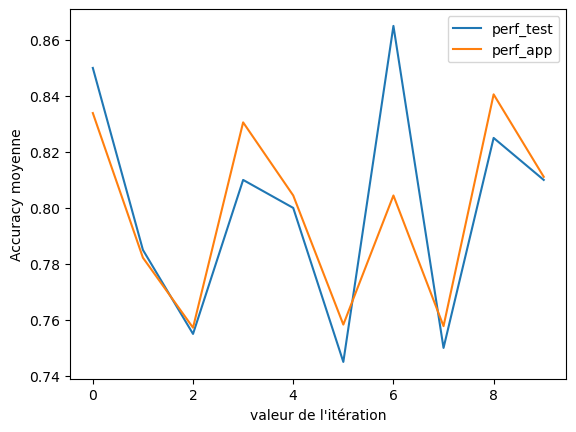

Accuracy moyenne apprentissage :  0.7980555555555555
Accuracy moyenne test :  0.7995


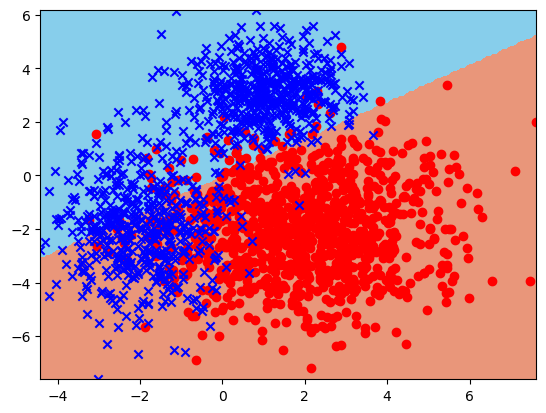

In [7]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

nb_iter = 10
e = 0.09
perf = []
perf_app = []
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = ClassifierPerceptron(2,e,False)
    perceptron.train(Xapp, Yapp)
    perf.append(perceptron.accuracy(Xtest, Ytest))
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
acc_moy_app = statistics.mean(perf_app) 

print("e = " + str(e) + " Taux de bonne classification moyen (base test): " + str(acc_moy))
print("e = " + str(e) + " Taux de bonne classification moyen (base apprentissage): " + str(acc_moy_app))

plt.plot(np.arange(0, nb_iter),perf, perf_app)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de l'itération")
plt.legend(['perf_test','perf_app'])
plt.show()

# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
plot_frontiere(X2D,Y2D,perceptron,step=150)
plot2DSet(X2D,Y2D)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf))

#### <font color="blue">Analyse du résultat</font>
Avec e = 0.09 et w = 0, on obtient des résultats relativement bons avec une accuracy de test moyenne de 0.79. On remarque de plus que l'accuracy de test est en moyenne très similaire à celle de l'apprentissage. Sur la deuxième image, on voit une répresentation graphique de la séparation des classes (pour la classification du dernier perceptron initialisé dans la boucle), on constate que pour la plupart des points ils se situent sur une surface de la même couleur qu'eux, ce qui signifie qu'ils sont bien classés.

### <font color="red">2.8 Test avec validation croisée en 10 avec e et w idéal - 5D</font>

e = 0.09 Taux de bonne classification moyen (base test) : 0.8295
e = 0.09 Taux de bonne classification moyen (base apprentissage): 0.8405555555555555


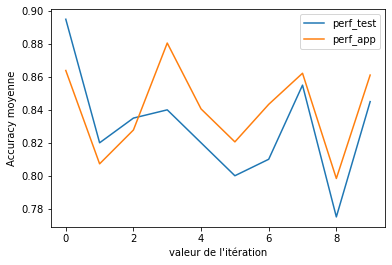

Accuracy moyenne apprentissage :  0.8405555555555555
Accuracy moyenne test :  0.8295


In [23]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
e = 0.09
nb_iter = 10

perf = []
perf_app = []
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = ClassifierPerceptron(5,e,False)
    perceptron.train(Xapp, Yapp)
    perf.append(perceptron.accuracy(Xtest, Ytest))
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
acc_moy_app = statistics.mean(perf_app) 

print("e = " + str(e) + " Taux de bonne classification moyen (base test) : " + str(acc_moy))
print("e = " + str(e) + " Taux de bonne classification moyen (base apprentissage): " + str(acc_moy_app))


plt.plot(np.arange(0, nb_iter),perf, perf_app)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de l'itération")
plt.legend(['perf_test','perf_app'])
plt.show()

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf))

#### <font color="blue">Analyse du résultat</font>
Avec e = 0.09 et w = 0, on obtient de bons résultats (légèrement meilleurs que pour le dataset 2D) avec une accuracy de test moyenne de 0.847. On remarque de plus que l'accuracy de test est en moyenne plus élevée que celle de l'apprentissage. Ici on ne peut pas facilement visualiser la séparation des classes sur un graphe comme on l'a fait ci-dessus pour les données 2D.

### <font color="red">2.9 Temps d'éxecution - 2D</font>

#### <font color="blue">Argumentation</font>
Pour finir l'étude de ce classifier, nous étudions le temps que met le classifier Perceptron à s'entraîner puis à classifier, afin de pouvoir comparer avec les autres classifiers

In [11]:
import time

nb_iter = 10
perf_app = []
perf_test = []
train_time = []
predict_time = []

# mélanger des exemples
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = ClassifierPerceptron(2,0.7, False)
    start_time = time.time()
    perceptron.train(Xapp, Yapp)
    train_time.append(time.time() - start_time)

    start_time = time.time()
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    perf_test.append(perceptron.accuracy(Xtest, Ytest))
    predict_time.append(time.time() - start_time)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))
print("Temps d'entraînement moyen : ", statistics.mean(train_time))
print("Temps de prédiction moyen : ", statistics.mean(predict_time))

Accuracy moyenne apprentissage :  0.8297222222222222
Accuracy moyenne test :  0.8325
Temps d'entraînement moyen :  11.295754647254943
Temps de prédiction moyen :  0.005556178092956543


### <font color="red">2.10 Temps d'éxecution - 5D</font>

In [10]:
import time

nb_iter = 10
perf_app = []
perf_test = []
train_time = []
predict_time = []

# mélanger des exemples
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = ClassifierPerceptron(5,0.7, False)
    start_time = time.time()
    perceptron.train(Xapp, Yapp)
    train_time.append(time.time() - start_time)

    start_time = time.time()
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    perf_test.append(perceptron.accuracy(Xtest, Ytest))
    predict_time.append(time.time() - start_time)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))
print("Temps d'entraînement moyen : ", statistics.mean(train_time))
print("Temps de prédiction moyen : ", statistics.mean(predict_time))

Accuracy moyenne apprentissage :  0.8435555555555556
Accuracy moyenne test :  0.841
Temps d'entraînement moyen :  13.589231705665588
Temps de prédiction moyen :  0.006584978103637696


## <font color="blue">3. Etude de la classe ClassifierPerceptronBiais:</font>

Voici la classe ClassifierPerceptronBiais :

In [8]:
class ClassifierPerceptronBiais(ClassifierPerceptron):
    """ Perceptron de Rosenblatt avec biais
        Variante du perceptron de base
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        # Appel du constructeur de la classe mère
        super().__init__(input_dimension, learning_rate, init)
        # Affichage pour information (décommentez pour la mise au point)
        #print("Init perceptron biais: w= ",self.w," learning rate= ",learning_rate)
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        desc_copie = desc_set.copy()
        np.random.shuffle(desc_copie)
        
        for i in range(len(desc_copie)):
            p = self.score(desc_copie[i])
            indice_xi = np.where(np.all(desc_set == desc_copie[i], axis=1))[0][0]
            yi = label_set[indice_xi]
            
            if(p*yi < 1):
                self.w = self.w + self.learning_rate * (yi - p) * desc_copie[i]
                self.allw.append(self.w.copy())
        return

### <font color="blue"> 3.1 Variation de l'accuracy en fonction de la vitesse d'apprentissage de poids 0 sur une base de test 2D:</font>

#### <font color="blue">Argumentation</font>
Pour décider quelle peut être la valeur du learning rate optimale, on décide de tester plusieurs valeurs différentes de  𝑒
  avec un poids w = 0 (d'abord) et de comparer les taux de bonne classification sur la base de test.

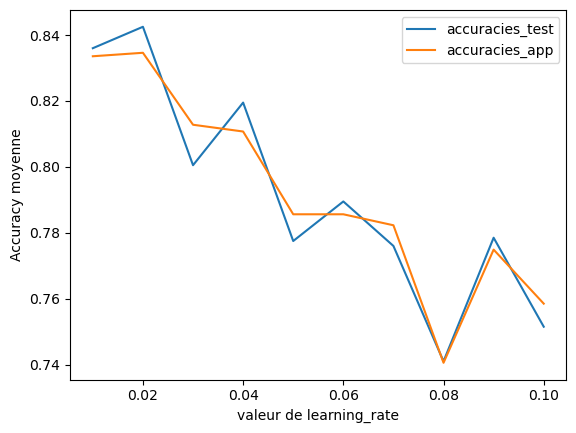

In [10]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptronBiais(2,e)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("test e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("app e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e,accuracies)
plt.plot(valeurs_e,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>
On remarque que la valeur de $e$ qui fournit le meilleur résultat est : lorsque $e$ = 0.02.

### <font color="blue"> 3.2 Variation de l'accuracy en fonction de la vitesse d'apprentissage sur une base de test 5D:</font>

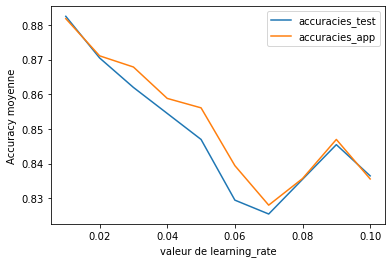

In [9]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)
#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptronBiais(5,e)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e ,accuracies)
plt.plot(valeurs_e ,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>
On remarque que la valeur de $e$ qui fournit le meilleur résultat est : lorsque $e$ = 0.01.

### <font color="blue"> 3.3 Variation de l'accuracy en fonction de la vitesse d'apprentissage de poids aléatoire sur une base de test 2D:</font>

#### <font color="blue">Argumentation</font>
Pour décider quelle peut être la valeur du learning rate optimale, on décide de tester plusieurs valeurs différentes de $e$ avec un poids w aléatoire et de comparer les taux de bonne classification sur la base de test.

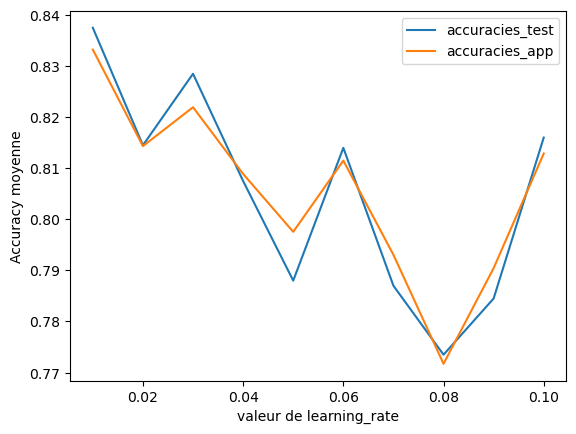

In [12]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)
#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptronBiais(2,e,False)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e,accuracies)
plt.plot(valeurs_e,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>
On remarque que la valeur de $e$ qui fournit le meilleur résultat est : lorsque $e$ = 0.01 lorsque le poids est aléatoire.


### <font color="blue"> 3.4 Variation de l'accuracy en fonction de la vitesse d'apprentissage de poids aléatoire sur une base de test 5D:</font>

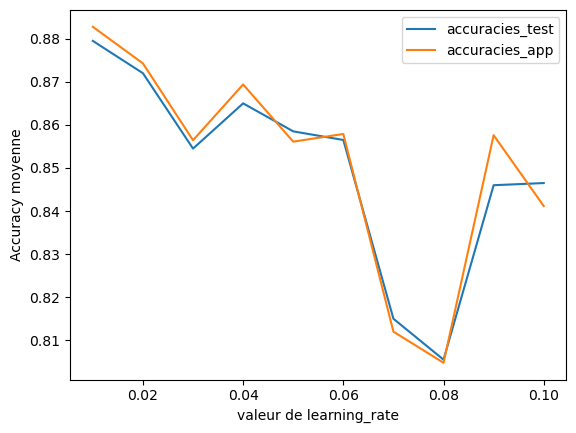

In [13]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptronBiais(5,e, False)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e,accuracies)
plt.plot(valeurs_e,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>

On remarque que la valeur de $e$ qui fournit le meilleur résultat est : lorsque $e$ = 0.01 lorsque le poids est aléatoire.
On remarque aussi, que le poids n'a pas une grande influence sur le taux d'accuracy.

### <font color="blue">3.5 Etude de la convergence et de la variation du poids et du coût sur une base de test 2D:</font>

#### <font color="blue">Argumentation</font>
Pour vérifier si l'algorithme converge vers une solution satisfaisante et à quelle vitesse, on étudie les variations du poids et du coût au fil de l'apprentissage. La première boît ci-dessous étudie la variation des poids, la deuxième boît la variation du coût, enfin la troisième boîte représente le coût en fonction du poids.

Nb iterations réalisées:  100


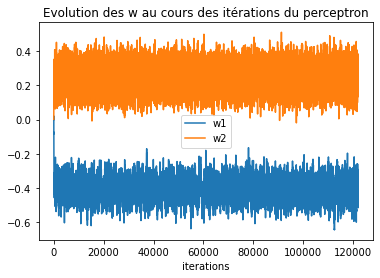

In [22]:
# étude de la variation des poids

index = np.random.permutation(len(X2D)) # mélange des index
Xm2 = X2D[index]
Ym2 = Y2D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

# Paramètres pour le perceptron:
dim = 2
eps = 0.01    # learning rate
poids_0 = False   # valeur initiale des poids à 0

# Réinitialisation de la graine pour la mise au point (à enlever ensuite !)
np.random.seed(42)   # on prend 42 comme graine

perceptron2 = ClassifierPerceptronBiais(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron2.train(Xm2, Ym2, nb_max=100)
print("Nb iterations réalisées: ", len(les_differences))

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw2 = np.array(perceptron2.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw2[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw2[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

min_cout: 802.1863106365616
 -> w: [-0.54807774  0.39126572]


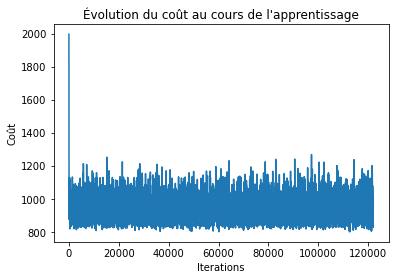

In [25]:
# étude de la variation du coût

# on considère les poids de perceptron2 générés dans une boite précédente:
allw2 = np.array(perceptron2.get_allw()) 

# ------------------------  A COMPLETER :
tabc = []
for w in allw2:
    cout = 0
    for i in range(len(Xm2)):
        score = np.dot(w, Xm2[i])
        if score * Ym2[i] < 1:
            cout += max(0, 1 - score * Ym2[i])
    tabc.append(cout)

print("min_cout: " + str(min(tabc)))
print(" -> w: " + str(allw2[tabc.index(min(tabc))]))
plt.figure()
plt.plot(tabc)
plt.xlabel('Iterations')
plt.ylabel('Coût')
plt.title('Évolution du coût au cours de l\'apprentissage')
plt.show() 

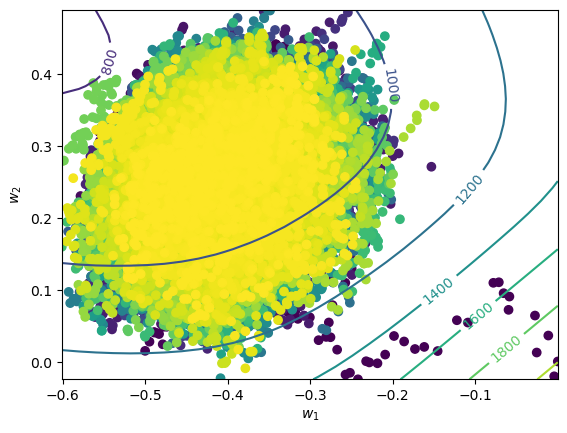

In [29]:
# représentation du coût en fonction du poids

# 1. Construction d'une grille de 'toutes' les valeurs possibles de w dans les bornes de allw
mmax=allw2.max(0)
mmin=allw2.min(0)
x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))

# 2. Evaluation du cout pour toutes ces solutions potentielles

# construction de res = calcul du cout du perceptron pour tous les couples
# (w1,w2) définis dans grid

# Comme plus haut mais version compacte
res = np.array([np.sum([max(0, 1 - np.dot(w, Xm2[i]) * Ym2[i]) for i in range(len(Xm2))]) for w in grid])


# remise en forme de res
res=res.reshape(x1grid.shape) 

fig, ax = plt.subplots() # pour 1 et 2
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
CS = ax.contour(x1grid,x2grid,res)
ax.clabel(CS, inline=1, fontsize=10)

# ajoute de la couleur: jaune = plus grande itération
ax.scatter(allw2[:,0], allw2[:,1], c=np.arange(len(allw2)))

#### <font color="blue">Analyse du résultat</font>
Sur l'image ci-dessus, les points jaunes sont les itérations pour lesquelles le perceptron a obtenu un coût élevé et les points violets sont ceux pour lesquels le perceptron a eu le coût le plus bas. Au cours de l'apprentissage, le coût évolue des points jaunes vers les points violets. Ici le perceptron avait été initialisé avec un poids de 0, on voit sur l'image que cela correspond à des points de très bas coût.

### <font color="blue">3.6 Etude de la convergence et de la variation du poids et du coût sur une base de test 5D:</font>

Nb iterations réalisées:  100


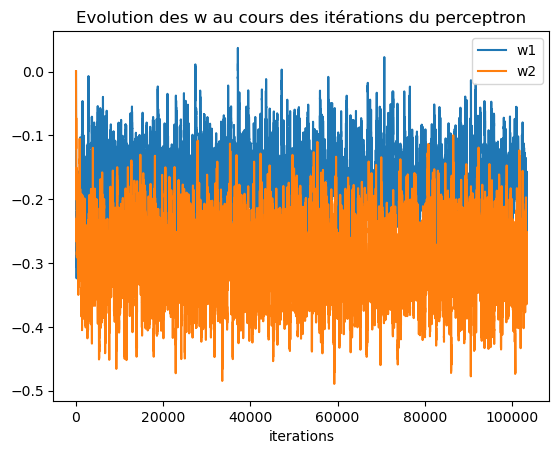

In [8]:
# étude de la variation des poids


index = np.random.permutation(len(X5D)) # mélange des index
Xm5 = X5D[index]
Ym5 = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

# Paramètres pour le perceptron:
dim = 5
eps = 0.01   # learning rate
poids_0 = False   # valeur initiale des poids à 0

# Réinitialisation de la graine pour la mise au point (à enlever ensuite !)
np.random.seed(42)   # on prend 42 comme graine

perceptron5 = ClassifierPerceptronBiais(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron5.train(Xm5, Ym5, nb_max=100)
print("Nb iterations réalisées: ", len(les_differences))

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw5 = np.array(perceptron5.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw5[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw5[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

min_cout: 599.7643847051224
 -> w: [-0.28424843 -0.36944553 -0.04113015 -0.59079421 -0.24312843]


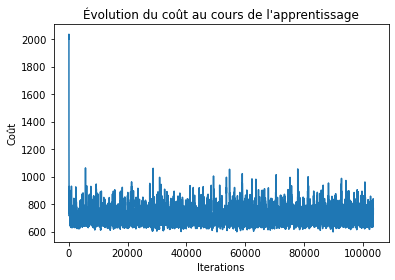

In [26]:
# on considère les poids de perceptron5 générés dans une boite précédente:
allw5 = np.array(perceptron5.get_allw()) 

# ------------------------  A COMPLETER :
tabc = []
for w in allw5:
    cout = 0
    for i in range(len(Xm5)):
        score = np.dot(w, Xm5[i])
        if score * Ym5[i] < 1:
            cout += max(0, 1 - score * Ym5[i])
    tabc.append(cout)

print("min_cout: " + str(min(tabc)))
print(" -> w: " + str(allw5[tabc.index(min(tabc))]))
plt.figure()
plt.plot(tabc)
plt.xlabel('Iterations')
plt.ylabel('Coût')
plt.title('Évolution du coût au cours de l\'apprentissage')
plt.show() 

#### <font color="blue">Analyse du résultat</font>
On constate que le coût moyen est en moyenne plus faible que le coût obtenu pour les données 2D.

### <font color="blue">3.7 Test avec validation croisée en 10 avec w et e idéal - 2D</font>

#### <font color="blue">Argumentation</font>
Nous effectuons une validation croisée en 10 afin d'avoir des résultats plus fiables et afin d'évaluer la capacité à généraliser à de nouvelles données du classifier Perceptron. Nous utilisons les paramètres que nous avons trouvé expérimentalement dans les sections ci-dessus, qui fournissent les meilleurs résultats, à savoir e = 0.02 et w = 0.

Taux de bonne classification moyen (base test) : 0.819
 Taux de bonne classification moyen (base apprentissage): 0.8213333333333334


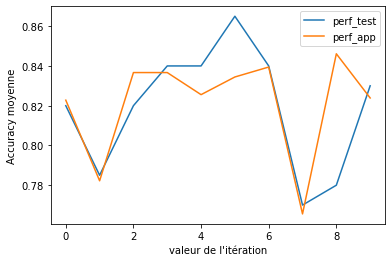

Accuracy moyenne apprentissage :  0.8213333333333334
Accuracy moyenne test :  0.819


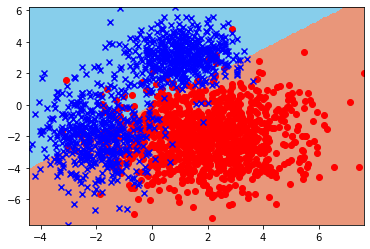

In [24]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

nb_iter = 10
e = 0.02

perf = []
perf_app = []
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = ClassifierPerceptronBiais(2,e,False)
    perceptron.train(Xapp, Yapp)
    perf.append(perceptron.accuracy(Xtest, Ytest))
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
acc_moy_app = statistics.mean(perf_app) 

print("Taux de bonne classification moyen (base test) : " + str(acc_moy))
print(" Taux de bonne classification moyen (base apprentissage): " + str(acc_moy_app))


plt.plot(np.arange(0, nb_iter),perf, perf_app)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de l'itération")
plt.legend(['perf_test','perf_app'])
plt.show()

# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
plot_frontiere(X2D,Y2D,perceptron,step=150)
plot2DSet(X2D,Y2D)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf))

#### <font color="blue">Analyse du résultat</font>
On voit sur la deuxième image que la séparation des classes est principalement bien faite mais il y a un certains nombre de points bleus mal classés.

### <font color="blue">3.8 Test avec validation croisée en 10 avec w et e idéal - 5D</font>

e = 0.01 Taux de bonne classification moyen : 0.8785000000000001
e = 0.01 Taux de bonne classification moyen : 0.8802777777777778


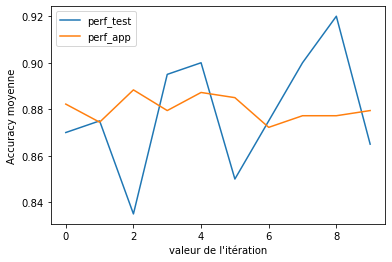

Accuracy moyenne apprentissage :  0.8802777777777778
Accuracy moyenne test :  0.8785000000000001


In [25]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]

nb_iter = 10
e = 0.01
perf = []
perf_app = []
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = ClassifierPerceptronBiais(5,e,False)
    perceptron.train(Xapp, Yapp)
    perf.append(perceptron.accuracy(Xtest, Ytest))
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
acc_moy_app = statistics.mean(perf_app) 

print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


plt.plot(np.arange(0, nb_iter),perf, perf_app)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de l'itération")
plt.legend(['perf_test','perf_app'])
plt.show()

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf))

### <font color="blue">3.9 Temps d'exécution - 2D</font>

Pour finir l'étude de ce classifier, nous étudions le temps que met le classifier PerceptronBiais à s'entraîner puis à classifier, afin de pouvoir comparer avec les autres classifiers

In [14]:
import time

nb_iter = 10
perf_app = []
perf_test = []
train_time = []
predict_time = []

# mélanger des exemples
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = ClassifierPerceptronBiais(2,0.01, False)
    start_time = time.time()
    perceptron.train(Xapp, Yapp)
    train_time.append(time.time() - start_time)

    start_time = time.time()
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    perf_test.append(perceptron.accuracy(Xtest, Ytest))
    predict_time.append(time.time() - start_time)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))
print("Temps d'entraînement moyen : ", statistics.mean(train_time))
print("Temps de prédiction moyen : ", statistics.mean(predict_time))

Accuracy moyenne apprentissage :  0.8192222222222223
Accuracy moyenne test :  0.8075
Temps d'entraînement moyen :  9.071714854240417
Temps de prédiction moyen :  0.005124425888061524


### <font color="blue">3.10 Temps d'exécution - 5D</font>

In [15]:
import time

nb_iter = 10
perf_app = []
perf_test = []
train_time = []
predict_time = []

# mélanger des exemples
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = ClassifierPerceptronBiais(5,0.01, False)
    start_time = time.time()
    perceptron.train(Xapp, Yapp)
    train_time.append(time.time() - start_time)

    start_time = time.time()
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    perf_test.append(perceptron.accuracy(Xtest, Ytest))
    predict_time.append(time.time() - start_time)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))
print("Temps d'entraînement moyen : ", statistics.mean(train_time))
print("Temps de prédiction moyen : ", statistics.mean(predict_time))

Accuracy moyenne apprentissage :  0.8772222222222222
Accuracy moyenne test :  0.875
Temps d'entraînement moyen :  9.30437605381012
Temps de prédiction moyen :  0.004624032974243164


##  <font color="orange"> 4. Synthèse des résultats</font>

### Différences entre dataset 2D et 5D
Globalement, les résultats obtenus pour le dataset 5D sont très similaires au dataset 2D, ce qui devrait être le cas.
On peut en conclure que nos fonctions marchent bien pour tout type de dimension.

### Vitesse d'apprentissage optimale en fonction du classifier utilisé

On a observé un learning rate optimal à 0.09 avec un taux de classification moyen à 0.8 pour le Perceptron, et un learning rate optimal à 0.02 avec un taux de bonne classification moyen à 0.88 pour le PerceptronBiais.

Le Perceptron Biais semble être un peu plus efficace que le Perceptron avec son learning rate optimal.



### Choix du k optimal pour le KNN

Pour le classifier KNN, nous avons constaté que les données 2D et 5D ne donnent pas la même estimation de k idéal.
En effet, pour les données 2D nous avons pu voir qu'il s'agit de k = 23, ce qui donne un taux de bonne classification à 0.92.
Pour les données 5D, notre analyse a donné qu'il s'agit de k = 1 avec un taux de bonne classification à 0.89, cependant lors de nos tests de validation croisée (cf. Validation croisée en 10 pour le KNN 5D) nous avons constaté avec étonnement qu'une valeur un peu plus élevée donnait de meilleurs résultats (nous avons choisi k = 5, pour un taux de bonne classfication de 0.88, vs 0.85 avec k = 1). Dans les deux cas, il semble que la plage de valeur de k = 1 jusqu'à k ~ 750 donne des résultats assez similaires.

### Poids optimal et évolution du coût en fonction du classifier utilisé

Pour le classifier Perceptron, on a observé une meilleure accuracy lorsque le poids est initialisé à 0.
Alors que pour le classifier PerceptronBiais, il n'y a pas de grandes différences entre l'initialisation à 0 ou l'initalisation aléatoire.

L'étude du coût en fonction de l'évolution des poids montre que pour le classifier Perceptron, les poids aux alentours de [0,0] sont de coût très élevé alors que c'est l'inverse pour le PerceptronBiais pour lequel les poids autour de [0,0] sont de coût faible. 

De plus, on observe en moyenne que le coût associé à la classification des données 5D est plus faible que celui associé à la classification des données 2D.
Enfin, on remarque également que le coût de la classification pour le PerceptronBiais est plus bas que le coût de la classification pour le Perceptron, ce qui semble cohérent comme le PerceptronBiais est une "amélioration" du Perceptron avec un apprentissage plus efficace.


### Temps d'exécution en fonction du classifier utilisé

Au niveau du temps d'entraînement, le perceptron K-NN prend beaucoup moins de temps que le Perceptron et le Perceptron Biais.  On a observé 7.057e-06 secondes pour le K-NN contrairement à 9.023 secondes et 9.341 secondes pour les deux autres.

C'est un résultat tout à fait normal puisque le K-NN ne nécessite pas d'apprentissage préalable, il suffit simplement de stocker l'ensemble des données d'entraînement, contrairement au Perceptron et PerceptronBiais qui nécessitent une phase d'apprentissage pour déterminer les poids optimaux.

Au niveau du temps de prédiction, c'est l'inverse, le perceptron K-NN prend plus de temps lors de l'exécution du test par rapport au Perceptron et Perceptron Biais. Les deux Perceptrons ont des durées d'exécution très similaires.
On a observé 0.391 secondes pour le K-NN et, 0.005 secondes et 0.005 secondes pour les deux autres.

En effet, le K-NN doit calculer la distance entre l'exemple courant et tous les exemples d'apprentissage, ce qui peut être coûteux en temps lorsque le nombre d'exemples d'apprentissage est grand. En revanche, le Perceptron et le Perceptron Biais n'ont pas besoin de calculer cette distance et effectuent seulement une multiplication matricielle pour prédire la classe de l'exemple, ce qui est beaucoup plus rapide.


### Conclusion sur la qualité de la classification

Nous pouvons constater que les trois classifiers ont des taux de bonne classification assez similaires, qui oscillent entre 0.80 et 0.90. Le KNN et le Perceptron Biais ont des résultats légèrement meilleurs, autour de 0.88. Cependant, le PerceptronBais sera généralement plus avantageux pour un dataset de grande taille car une fois l'apprentissage fait, le temps de classification ne dépend pas de la taille du dataset, contrairement au KNN qui aura un temps de classification très long avec un grand dataset.